In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
df= sns.load_dataset('diamonds')

In [7]:
df.shape 

(53940, 10)

In [9]:
#preprcessing
X = df.drop('price', axis=1)
y = df['price']

# encode the categorical variables
le=LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standarize the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
# create neural network architecture
model = keras.Sequential([
    layers.InputLayer(input_shape=[X_train.shape[1]]),  # #input layer without any activation function
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(X_train,y_train, epochs=4, verbose=1 , validation_split=0.2, batch_size=32)

Epoch 1/4
1079/1079 [==============================] - 5s 4ms/step - loss: 21075220.0000 - val_loss: 4820426.0000
Epoch 2/4
1079/1079 [==============================] - 4s 3ms/step - loss: 2901281.0000 - val_loss: 1821037.1250
Epoch 3/4
1079/1079 [==============================] - 4s 3ms/step - loss: 1952927.7500 - val_loss: 1537102.1250
Epoch 4/4
1079/1079 [==============================] - 3s 3ms/step - loss: 1816482.0000 - val_loss: 1485264.7500


In [15]:
# test loss of the model
loss = model.evaluate(X_test,y_test,)
print(f'Test loss: {loss}')

338/338 [==============================] - 1s 3ms/step - loss: 1459637.2500
Test loss: 1459637.25


## import Call_back function

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stopping= EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
)

history=model.fit(X_train, y_train, epochs= 10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1079/1079 [==============================] - 4s 4ms/step - loss: 1519765.0000 - val_loss: 1319464.5000
Epoch 2/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1503909.2500 - val_loss: 1309088.2500
Epoch 3/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1488946.7500 - val_loss: 1321363.8750
Epoch 4/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1475040.5000 - val_loss: 1293943.0000
Epoch 5/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1459562.5000 - val_loss: 1280011.1250
Epoch 6/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1443562.1250 - val_loss: 1269744.0000
Epoch 7/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1426323.7500 - val_loss: 1261595.8750
Epoch 8/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1411515.3750 - val_loss: 1262967.5000
Epoch 9/10
1079/1079 [==============================] - 4s 3ms/step - loss: 1397025.0000

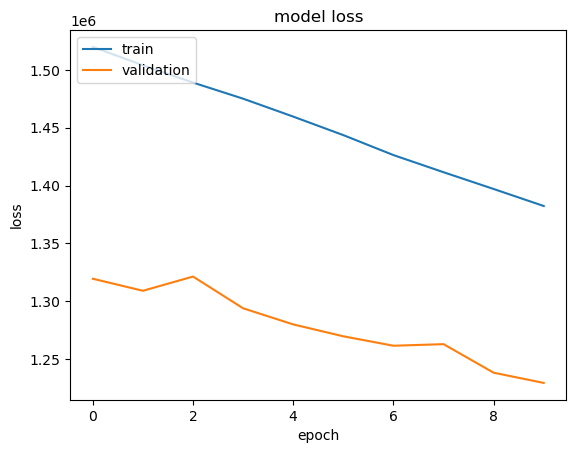

In [21]:
# plot the training and validation loss here

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
# Load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Separate features and target
X = tips.drop('total_bill', axis=1) # assuming we're predicting the total_bill
y = tips['total_bill']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# # Define the model
model = keras.Sequential([
    layers.InputLayer(input_shape=[X_train.shape[1]]),  # #input layer without any activation function
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])



Epoch 1/300
5/5 [==============================] - 2s 108ms/step - loss: 486.3007 - val_loss: 464.9142
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 484.2965 - val_loss: 463.0833
Epoch 3/300
5/5 [==============================] - 0s 18ms/step - loss: 481.9895 - val_loss: 460.8347
Epoch 4/300
5/5 [==============================] - 0s 19ms/step - loss: 479.4838 - val_loss: 458.0870
Epoch 5/300
5/5 [==============================] - 0s 20ms/step - loss: 476.4707 - val_loss: 454.8929
Epoch 6/300
5/5 [==============================] - 0s 18ms/step - loss: 472.9419 - val_loss: 451.1104
Epoch 7/300
5/5 [==============================] - 0s 18ms/step - loss: 468.6287 - val_loss: 446.4870
Epoch 8/300
5/5 [==============================] - 0s 20ms/step - loss: 463.2354 - val_loss: 440.9494
Epoch 9/300
5/5 [==============================] - 0s 18ms/step - loss: 456.8126 - val_loss: 434.2170
Epoch 10/300
5/5 [==============================] - 0s 17ms/step - loss: 448.6884

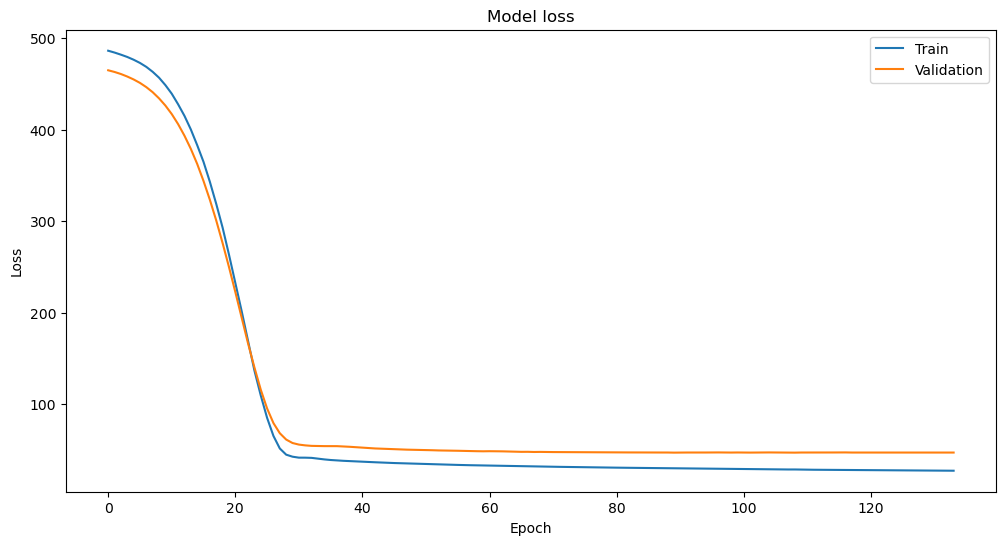

2/2 [==============================] - 0s 6ms/step - loss: 40.2599
Test loss: 40.259918212890625


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=25,  
    restore_best_weights=True  
)

# Train the model with the early stopping callback
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=300,  
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

  